Загрузка PySpark

In [148]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/grap

In [149]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [150]:
!wget -q https://mirror.linux-ia64.org/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

In [151]:
!tar -xvf spark-3.0.3-bin-hadoop2.7.tgz

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop2.7/jars/
spark-3.0.3-bin-hadoop2.7/jars/jacks

In [152]:
!pip install -q findspark

In [153]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

In [154]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

1.Загрузите данные при помощи spark.read.csv из приложенного файла.

In [155]:
df = spark.read.csv('iris.csv', inferSchema = True, header = True)

2.Выведите 5 первых строк данных.

In [156]:
df.take(5)

[Row(sepal.length=5.1, sepal.width=3.5, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.9, sepal.width=3.0, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.7, sepal.width=3.2, petal.length=1.3, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.6, sepal.width=3.1, petal.length=1.5, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=5.0, sepal.width=3.6, petal.length=1.4, petal.width=0.2, variety='Setosa')]

In [157]:
df = df.withColumnRenamed('sepal.length', 'sepal_length')
df = df.withColumnRenamed('sepal.width', 'sepal_width')
df = df.withColumnRenamed('petal.length', 'petal_length')
df = df.withColumnRenamed('petal.width', 'petal_width')

3.Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width').

In [158]:
df_grp = df.groupBy('variety')

In [159]:
df_max = df_grp.max('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [160]:
df_max.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [161]:
df_min = df_grp.min('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [162]:
df_min.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [163]:
df_avg = df_grp.avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [164]:
df_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



4.Постройте точечную диаграмму для petal_length и petal_width, раскрашенный по типам цветков.

In [165]:
import pandas as pd

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [167]:
df1 = pd.read_csv('iris.csv', header=None, encoding="utf8")
df1.tail()

,0,1,2,3,4
146,6.7,3,5.2,2.3,Virginica
147,6.3,2.5,5,1.9,Virginica
148,6.5,3,5.2,2,Virginica
149,6.2,3.4,5.4,2.3,Virginica
150,5.9,3,5.1,1.8,Virginica


In [168]:
# select
y = df1.iloc[:, 4].values
#y = np.where(y == 'Iris-setosa', -1, 1)

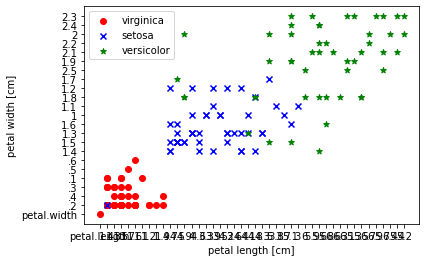

In [169]:
# extract sepal length and petal length
X = df1.iloc[:, [2, 3]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='virginica')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='setosa')
plt.scatter(X[100:150, 0], X[100:150, 1],
            color='green', marker='*', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

#plt.savefig('images/02_06.png', dpi=300)
plt.show()

5.Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA -ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN).

6.При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием.

In [170]:
from pyspark.sql.functions import col, expr, when

In [171]:
prediction = when(df['petal_length'] <= 1.2, 0).when(df['petal_length'] >= 1.7, 2).otherwise(1)

In [172]:
df = df.withColumn('prediction', prediction)

In [173]:
df.show()

+------------+-----------+------------+-----------+-------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|prediction|
+------------+-----------+------------+-----------+-------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|         1|
|         4.9|        3.0|         1.4|        0.2| Setosa|         1|
|         4.7|        3.2|         1.3|        0.2| Setosa|         1|
|         4.6|        3.1|         1.5|        0.2| Setosa|         1|
|         5.0|        3.6|         1.4|        0.2| Setosa|         1|
|         5.4|        3.9|         1.7|        0.4| Setosa|         2|
|         4.6|        3.4|         1.4|        0.3| Setosa|         1|
|         5.0|        3.4|         1.5|        0.2| Setosa|         1|
|         4.4|        2.9|         1.4|        0.2| Setosa|         1|
|         4.9|        3.1|         1.5|        0.1| Setosa|         1|
|         5.4|        3.7|         1.5|        0.2| Setosa|         1|
|     

7.Проверьте качество своего предсказания.

Для этого:

7.1.Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный классбыл так же Setosa.

7.2.Подсчитайте количество строк, где Вы предсказаликласс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" -!=)

In [175]:
# Предсказание Setosa и факт Setosa совпадают
df_filter = df.where((df['prediction']==1) & (df['variety'] == 'Setosa'))

In [176]:
from itertools import count
df_filter.count()

40

In [177]:
# Предсказание Setosa, а факт другой цветок
df_filter1 = df.where((df['prediction']==1) & (df['variety'] != 'Setosa'))
df_filter1.count()

0

In [178]:
# Предсказание не Setosa, а факт Setosa
df_filter2 = df.where((df['prediction']!=1) & (df['variety'] == 'Setosa'))
df_filter2.count()

10